In [0]:
import pandas as pd

In [0]:
Dep = pd.DataFrame(pd.read_csv('3yrDEP.csv'))
Dep.drop('Unnamed: 0', axis =1, inplace = True)
Indep = pd.DataFrame(pd.read_csv('IndependentMatrix.csv'))
Indep.drop('Unnamed: 0', axis = 1, inplace = True)
df = pd.merge(Indep, Dep, on='business_id')
df.drop('0', axis = 1, inplace = True)


In [0]:
df.head()
df.shape

(37774, 272)

In [0]:
# duplicateColumnNames = set()
#     # Iterate over all the columns in dataframe
# for x in range(df.shape[1]):
#     # Select column at xth index.
#     col = df.iloc[:, x]
#     # Iterate over all the columns in DataFrame from (x+1)th index till end
#     for y in range(x + 1, df.shape[1]):
#         # Select column at yth index.
#         otherCol = df.iloc[:, y]
#         # Check if two columns at x 7 y index are equal
#         if col.equals(otherCol):
#             duplicateColumnNames.add(df.columns.values[y])

# list(duplicateColumnNames)

['africanamerican',
 'kids',
 'halal',
 'kosherDENS',
 'Music',
 'DietaryRestrictions',
 'asianDENS',
 'extensions',
 'asian',
 'africanamericanDENS',
 'BusinessParkingDENS',
 'perms',
 'no_music',
 'GoodForMeal',
 'permsDENS',
 'kosher',
 'GoodForMealDENS',
 'no_musicDENS',
 'BestNightsDENS',
 'BusinessParking',
 'soy-free',
 'MusicDENS',
 '0DENS',
 'extensionsDENS',
 'BestNights',
 'halalDENS',
 ' Canadian (New)',
 'kidsDENS',
 'DietaryRestrictionsDENS']

In [0]:
print(duplicateColumnNames)

{'africanamerican', 'kids', 'halal', 'kosherDENS', 'Music', 'DietaryRestrictions', 'asianDENS', 'extensions', 'asian', 'africanamericanDENS', 'BusinessParkingDENS', 'perms', 'no_music', 'GoodForMeal', 'permsDENS', 'kosher', 'GoodForMealDENS', 'no_musicDENS', 'BestNightsDENS', 'BusinessParking', 'soy-free', 'MusicDENS', '0DENS', 'extensionsDENS', 'BestNights', 'halalDENS', ' Canadian (New)', 'kidsDENS', 'DietaryRestrictionsDENS'}


In [0]:
df = df.drop(columns=duplicateColumnNames)
df.shape
df.to_csv('dataToUseInModel2.csv')

In [0]:
df.shape

(37774, 243)

In [0]:
df1 = df.loc[:, ~df.columns.duplicated()]
df1.shape
#df1.to_csv('dataToUseInModel3.csv')

(37774, 272)

In [0]:
# assigns inputs and outputs
X = df[df.columns[3:271]]
y = df['3']

In [0]:
# linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
dfA = df
dfA['predicted'] = model.predict(X)

In [0]:
#plot
# !pip install matplotlib
import matplotlib.pyplot as plt
dfA[['3', 'predicted']].plot(alpha=0.7)

In [0]:
# check params
params = pd.Series(model.coef_, index=X.columns)
params

Ambience                        0.000010
BYOBCorkage                     1.452143
BikeParking                     0.467407
BusinessAcceptsBitcoin         -2.563635
BusinessAcceptsCreditCards     -0.065299
                                 ...    
%Asian                        180.840222
%Pacific                      204.066788
%multiracial                 -206.161986
1                              -0.016026
2                               0.846169
Length: 268, dtype: float64

In [0]:
# computes r2
from sklearn.metrics import r2_score
r2 = r2_score(dfA['3'], dfA['predicted'])
r2

0.8367729346030041

In [0]:
adjR2 = 1-(1-r2)*(len(dfA)-1)/(len(dfA)-len(dfA.columns)-1)
adjR2

0.8355846415669139

In [0]:
Zips = []
for x in df['postal_code']:
    if x not in Zips:
        Zips.append(x)

In [0]:
ziptoCTY = pd.DataFrame(pd.read_csv('ziptoCounty.csv'))
ziptoCTY.drop('Unnamed: 0', axis = 1, inplace = True)

In [0]:
def topXparams(ser, x):
    analyze = pd.DataFrame(ser)
    topnumbers = x
    counter = 0
    values = [99999]
    labels = []
    while counter < topnumbers:
        ascend = 0
        templab = ''
        for y in analyze.index:
            test = analyze.loc[y,analyze.columns[0]]
            if abs(test) > abs(ascend) and abs(test) < abs(values[-1]):
                ascend = test
                templab = y
        values.append(ascend)
        labels.append(templab)
        counter += 1
    values = values[1:]
    dictionary = dict(zip(labels, values))
    return dictionary

In [0]:
def regressZip(zipcode, numParams):
    spec = pd.DataFrame(dfraw[dfraw['postal_code'] == zipcode])
    spec.drop(spec.columns[89:177], axis = 1, inplace = True) #drop all zipcode constant data
    spec.drop(spec.columns[165:181], axis = 1, inplace = True)
    xNew = spec[spec.columns[3:-1]]
    yNew = spec['3']
    model = LinearRegression()
    model.fit(xNew, yNew)
    spec['predicted'] = model.predict(xNew)
    r2 = r2_score(spec['3'], spec['predicted'])
    print('Zipcode: ' + str(zipcode))
    
    sub = ziptoCTY[ziptoCTY['zip'] == zipcode]
    print('STATE: ' + sub.loc[sub.index[0],'STNAME'])
    print('COUNTY: ' + sub.loc[sub.index[0],'CTYNAME'])
    
    print('Number of Restaurants: ' + str(len(spec)))
    print('r2 = ' + str(r2))
    ser = pd.Series(model.coef_, index=xNew.columns)
    print(topXparams(ser, numParams))
    spec[['3', 'predicted']].plot(alpha=0.8)

In [5]:
Dep = pd.DataFrame(pd.read_csv('3yrDEP.csv'))
Dep.drop('Unnamed: 0', axis =1, inplace = True)
Indep = pd.DataFrame(pd.read_csv('IndependentMatrix.csv'))
Indep.drop('Unnamed: 0', axis = 1, inplace = True)
dfraw = pd.merge(Indep, Dep, on='business_id')
dfraw.drop('0', axis = 1, inplace = True)

FileNotFoundError: ignored

In [6]:
regressZip(28217, 5)

NameError: ignored

In [0]:
import random

In [0]:
dfraw

,business_id,postal_code,Alcohol,Ambience,BYOBCorkage,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,...,%female,%white,%AfrAmerican,%AmIndian,%Asian,%Pacific,%multiracial,1,2,3
0,gnKjwL_1w79qoiV3IC_xQQ,28210,1,0,0,1,0,1,0,0,...,0.519139,0.594716,0.344601,0.015256,0.070444,0.001929,0.023974,5.0,5.0,4.0
1,vlLHfWn-Gyyfnh5Lp_kJsg,28210,0,0,0,0,0,1,0,0,...,0.519139,0.594716,0.344601,0.015256,0.070444,0.001929,0.023974,1.0,0.0,1.0
2,14lFMDFnyPhXnPXgS4rlvg,28210,0,0,0,0,0,1,0,0,...,0.519139,0.594716,0.344601,0.015256,0.070444,0.001929,0.023974,1.0,2.0,0.0
3,b42EKdSk61zd_FEqEwioYQ,28210,2,0,0,1,0,1,0,0,...,0.519139,0.594716,0.344601,0.015256,0.070444,0.001929,0.023974,2.0,4.0,8.0
4,XPPt-Z9t3LWhsomIpQ-Thw,28210,0,0,0,1,0,1,0,0,...,0.519139,0.594716,0.344601,0.015256,0.070444,0.001929,0.023974,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37769,yhdhklGlRsoeW-x7A_pVmw,85019,0,0,0,0,0,1,0,0,...,0.505372,0.857589,0.075396,0.036677,0.057660,0.005314,0.029960,1.0,2.0,1.0
37770,J2yHV9KNwBHD7bnGMANCpw,85019,0,0,0,1,0,1,0,0,...,0.505372,0.857589,0.075396,0.036677,0.057660,0.005314,0.029960,5.0,1.0,1.0
37771,sByhyN_S2FgNnPl5pqY0Ow,85019,0,0,0,1,0,1,0,0,...,0.505372,0.857589,0.075396,0.036677,0.057660,0.005314,0.029960,1.0,0.0,5.0
37772,R8ior7Wkm44dBRlFIhUVsg,85019,0,0,0,1,0,1,0,0,...,0.505372,0.857589,0.075396,0.036677,0.057660,0.005314,0.029960,1.0,0.0,1.0


In [0]:
for i in df.columns:
    print(i)

business_id
postal_code
Alcohol
Ambience
BYOBCorkage
BikeParking
BusinessAcceptsBitcoin
BusinessAcceptsCreditCards
BusinessParking
ByAppointmentOnly
Caters
CoatCheck
DogsAllowed
DriveThru
GoodForDancing
GoodForKids
HappyHour
HasTV
NoiseLevel
OutdoorSeating
RestaurantsAttire
RestaurantsDelivery
RestaurantsGoodForGroups
RestaurantsPriceRange2
RestaurantsReservations
RestaurantsTableService
RestaurantsTakeOut
Smoking
WheelchairAccessible
WiFi
background_music
breakfast
brunch
casual
classy
dessert
dinner
divey
dj
friday
garage
hipster
intimate
jukebox
karaoke
latenight
live
lot
lunch
monday
no_music
romantic
saturday
street
sunday
thursday
touristy
trendy
tuesday
upscale
valet
validated
video
wednesday
Corkage
BYOB
GoodForMeal
Music
AgesAllowed
AcceptsInsurance
dairy-free
gluten-free
vegan
kosher
halal
soy-free
vegetarian
BestNights
straightperms
coloring
extensions
africanamerican
curly
kids
perms
asian
Open24Hours
DietaryRestrictions
RestaurantsCounterService
AlcoholDENS
AmbienceDENS
BY

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(xNew, yNew, test_size = 0.2)

NameError: name 'xNew' is not defined

In [0]:
X_train.shape, X_test.shape

((30219, 268), (7555, 268))

In [0]:
import tensorflow as tf
from tensorflow import keras

/Users/sitara.uppalapati/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [0]:
y_train

24003     3.0
22239     0.0
21543    10.0
15207     5.0
8952      0.0
         ... 
10904     3.0
25058     6.0
3004      2.0
22643    12.0
26740     4.0
Name: 3, Length: 30219, dtype: float64

In [0]:
!python -m pip install keras==2.1.5

In [0]:
import tensorflow as tf

In [0]:
X_train.shape

(30219, 268)

In [0]:
model.layers

AttributeError: 'LinearRegression' object has no attribute 'layers'

In [0]:
X_train.shape

(30219, 268)

In [0]:
modelFinal = tf.keras.Sequential()
#model.add(tf.keras.layers.Reshape((1,296)))
#model.add(tf.keras.layers.LSTM(24, input_shape=(10884, 296), return_sequences=True, implementation=2))
modelFinal.add(tf.keras.layers.Dense(100, input_shape=(268,),activation='softmax'))
modelFinal.add(tf.keras.layers.Dense(1, input_shape=(100,),activation='tanh'))
mse = tf.keras.losses.mean_squared_error
modelFinal.compile(loss=mse, optimizer = tf.keras.optimizers.SGD())
modelFinal.fit(X_train.values, y_train.values, epochs=10, batch_size=6000, verbose=2, validation_data=(X_test.values, y_test.values))

Train on 30219 samples, validate on 7555 samples
Epoch 1/10
 - 1s - loss: 1260.7709 - val_loss: 846.8488
Epoch 2/10
 - 0s - loss: 1251.6848 - val_loss: 845.6567
Epoch 3/10
 - 0s - loss: 1250.8650 - val_loss: 845.2631
Epoch 4/10
 - 0s - loss: 1250.5475 - val_loss: 845.0776
Epoch 5/10
 - 0s - loss: 1250.3876 - val_loss: 844.9707
Epoch 6/10
 - 0s - loss: 1250.2906 - val_loss: 844.9037
Epoch 7/10
 - 0s - loss: 1250.2301 - val_loss: 844.8582
Epoch 8/10
 - 0s - loss: 1250.1852 - val_loss: 844.8218
Epoch 9/10
 - 0s - loss: 1250.1503 - val_loss: 844.7928
Epoch 10/10
 - 0s - loss: 1250.1229 - val_loss: 844.7708


In [0]:
y_pred_labels = modelFinal.predict_proba(X_test)
print(y_pred_labels)

[[0.98958504]
 [0.98958504]
 [0.98958504]
 ...
 [0.98958504]
 [0.98958504]
 [0.98958504]]


In [0]:
pred = y_pred_labels.flatten()

In [0]:
import sklearn as sk

In [0]:
sk.metrics.mean_squared_error(pred,y_test)

844.7705917871065

In [0]:
import matplotlib.pyplot as plt

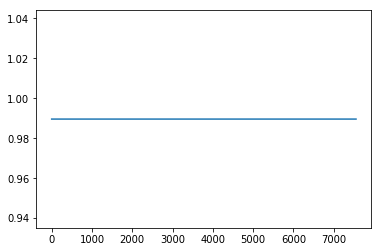

In [0]:
plt.plot(pred)